In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np

# A).

In [ ]:
# 1).
random_list_a = [random.randint(1, 10) for i in range(10)]
display(random_list_a)


for i in range(10):
    print([random.randint(1, 10) for j in range(10)])
# 2). yes they are

# 3).
random.seed(5)
random_list_a = [random.randint(1, 10) for i in range(10)]
display(random_list_a)

# B).

In [ ]:
# 1).
func_1 = lambda x: (x+3) % 10

x_0 = 1

random_list_b = np.empty(25)
random_list_b[0] = x_0

for i in range(1, random_list_b.size):
    random_list_b[i] = func_1(random_list_b[i-1])

print(random_list_b)


# 2). המחזור הוא באורך 11

# 3).
func_2 = lambda x: (x+4) % 10

x_0 = 1

random_list_b = np.empty(25)
random_list_b[0] = x_0

for i in range(1, random_list_b.size):
    random_list_b[i] = func_2(random_list_b[i-1])

print(random_list_b)
# המחזור נהיה באורך 6

# C).

In [ ]:
func_n = lambda a_func, c_func, m_func, prev_x: ((a_func * prev_x) + c_func) % m_func

# 1).
a = 5
c = 1
m = 16
x_0 = 1

random_list_c = np.empty(20)
random_list_c[0] = x_0

for i in range(1, 20):
    random_list_c[i] = func_n(a, c, m, random_list_c[i-1])
print(random_list_c)

# 2). מחזוריות של 17

# 3).
a = 9
c = 4
m = 16
x_0 = 1

random_list_c = np.empty(20)
random_list_c[0] = x_0

for i in range(1, 20):
    random_list_c[i] = func_n(a, c, m, random_list_c[i-1])
print(random_list_c)
# המחזוריות קטנה ל5

# D).

In [3]:
func_n = lambda a_func, c_func, m_func, prev_x: ((a_func * prev_x) + c_func) % m_func

In [ ]:
# 1).
a = 5
c = 1
m = 16
x_0 = 1

random_list_d = np.empty(20)
random_list_d[0] = x_0

for i in range(1, 20):
    random_list_d[i] = (func_n(a, c, m, random_list_d[i-1]))

print(random_list_d/m)

# 2). yes
a = 5
c = 1
m = 16
x_0 = 1

random_list_d = np.empty(1000)
random_list_d[0] = x_0

for i in range(1, 1000):
    random_list_d[i] = (func_n(a, c, m, random_list_d[i-1]))

plt.hist(random_list_d/m, bins=100)
plt.show()


# 3). no
plt.scatter(range(1000), random_list_d/m)
plt.show()

In [1]:
# 4).
def normalized_LCG_for_amount(a_func, c_func, m_func, seed, amount=1000):
    randomized_list_LCG = np.empty(amount)
    randomized_list_LCG[0] = seed

    for i in range(1, amount):
        randomized_list_LCG[i] = func_n(a_func, c_func, m_func, randomized_list_LCG[i-1])
    
    return randomized_list_LCG / m_func

In [ ]:
a_params = [19, 19, 19, 75]
c_params = [51, 51, 51, 0]
m_params = [100, 100, 100, ((2**31)-1)]
seeds = [25, 90, 25, 1]

for i in range(4):
    plt.hist(normalized_LCG_for_amount(a_params[i], c_params[i], m_params[i], seeds[i], 100_000), bins=100)
    plt.show()

In [ ]:
# 4). because the period is so big, you cant see the next one so it appears random.

In [40]:
# 5).
LearmonthLewis = normalized_LCG_for_amount(75, 0, (2**31)-1, 1, 100_000)
print(f"mean={np.mean(LearmonthLewis)}")
print(f"stdev={np.std(LearmonthLewis)}")
print(f"median={np.median(LearmonthLewis)}")
print(f"quantiles={np.quantile(LearmonthLewis, [0.25, 0.5, 0.75])}")

mean=0.5003806454815812
stdev=0.288917136799726
median=0.49996189237570476
quantiles=[0.24928196 0.49996189 0.75124321]


# E).

In [15]:
def cov(y, k):
    mean_val = np.mean(y)
    sum = 0

    for i in range(np.size(y) - k):
        sum += (y[i] - mean_val)*(y[i+k] - mean_val)
    
    return sum / np.size(y)

def autocorrelation(y, k):
    return cov(y, k) / np.var(y)

def autocorrelation_of_all_lags(y):
    out = np.empty(y.size)
    for i in range(y.size):
        out[i] = autocorrelation(y, i)
    return out

# F).

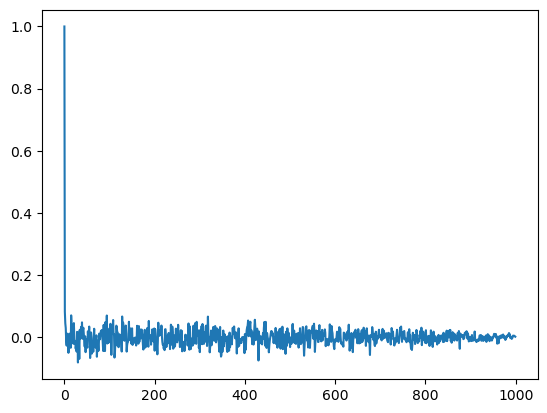

In [6]:
# 1).
randomized_list = normalized_LCG_for_amount(75, 0, (2**31)-1, 1, 1_000)
autocorrelated = [autocorrelation(randomized_list, k) for k in range(np.size(randomized_list+1))]
plt.plot(autocorrelated)
plt.show()

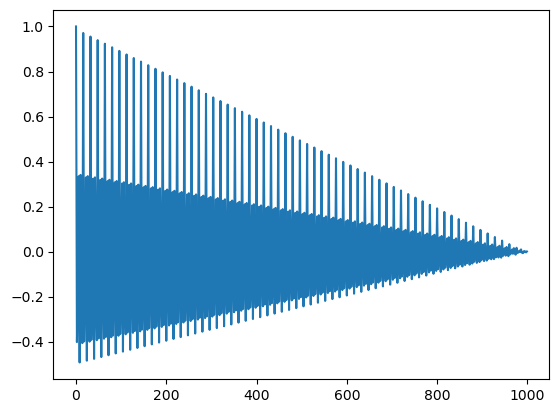

In [8]:
# 2).
randomized_list = normalized_LCG_for_amount(25, 2, 10**5, 1, 1_000)
autocorrelated = [autocorrelation(randomized_list, k) for k in range(np.size(randomized_list+1))]
plt.plot(autocorrelated)
plt.show()

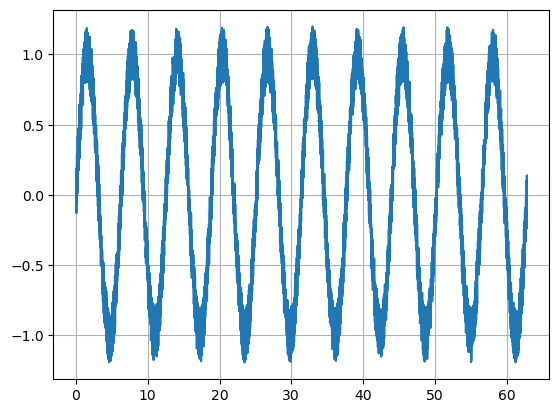

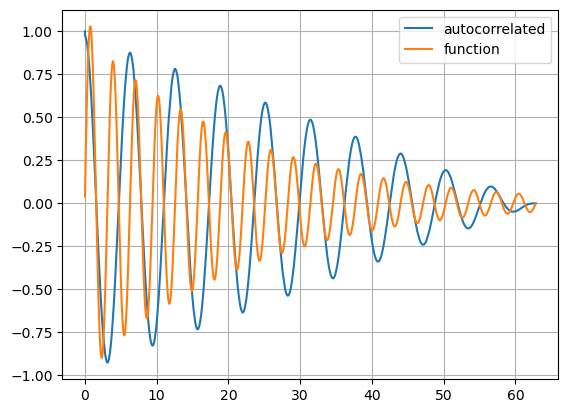

In [38]:
# 3).
sample_size_f = 5_000
randomized_list = np.random.uniform(-0.2, 0.2, sample_size_f)
sin_list_x_f = np.linspace(0, 20*np.pi, sample_size_f)
sin_list_y_f = np.sin(sin_list_x_f)

noisy_f = sin_list_y_f + randomized_list
plt.plot(sin_list_x_f, noisy_f)
plt.grid()
plt.show()

plt.plot(sin_list_x_f, autocorrelation_of_all_lags(noisy_f), label="autocorrelated")
plt.plot(sin_list_x_f[1:], np.sin(2*sin_list_x_f[1:])/(sin_list_x_f[1:])**(0.01*sin_list_x_f[1:] + 0.1), label="function")
plt.grid()
plt.legend()
plt.show()